***TAREA 1***

**1) API BCRA:**

Defina una función que, tomando como input la fecha “desde” y la fecha “hasta” retorne un
dataframe de pandas en donde cada fila es una fecha contenida en el período indicado y las
columnas corresponden a las principales variables monetarias del Banco Central de la
República Argentina (BCRA). Debe utilizarse la versión 3 de la API del BCRA

In [289]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

#Obtener la fecha actual
fecha_actual = datetime.today()

#Formateo de fecha: "YYYY-MM-DD"
fecha_formateada =  fecha_actual.strftime('%Y-%m-%d')
print(f"La fecha actual es: {fecha_formateada}")

fecha_inicio = fecha_actual - timedelta(days=365)
fecha_inicio_formateada = fecha_inicio.strftime('%Y-%m-%d')
print(f"La fecha de inicio es: {fecha_inicio_formateada}")

# Direccion de la API
url = "https://api.bcra.gob.ar/estadisticas/v3.0/monetarias"

# Se hace la solicitud
response = requests.get(url, verify=False )
data = response.json()

df = pd.DataFrame(data['results'])

# Filtrar para quedarte solo con los que contienen exactamente "Principales Variables" como solicita el TP
df["categoria"] = df["categoria"].str.strip().str.lower()
df_filtrado = df[df["categoria"] == "principales variables"]


La fecha actual es: 2025-04-28
La fecha de inicio es: 2024-04-28


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



In [290]:
#Creo una lista con todos las categorias seleccionadas y luego realizo un loop para armar una tabla con todos los datos de estas categorias 
lista_idV = df_filtrado["idVariable"].tolist()

def numeros_evaluar(lista_idV):
    dataframes = []

    for p in lista_idV:
        print(f"Número: {p}")
        url = f"https://api.bcra.gob.ar/estadisticas/v3.0/monetarias/{p}?desde={fecha_inicio_formateada}&hasta={fecha_formateada}"
        res = requests.get(url, verify=False)

        if res.status_code == 200:
            data = res.json()
            if 'results' in data:
                df = pd.DataFrame(data['results'])
                df['idVariable'] = p
                dataframes.append(df)
                print(f"idVariable {p} cargado con {len(df)} filas")
            else:
                print(f"idVariable {p} no contiene datos")
        else:
            print(f"Error al consultar idVariable {p}: {res.status_code}")

    df_final = pd.concat(dataframes, ignore_index=True)
    return df_final

df_total = numeros_evaluar(lista_idV)

Número: 1


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 1 cargado con 240 filas
Número: 4


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 4 cargado con 242 filas
Número: 5


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 5 cargado con 242 filas
Número: 6


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 6 cargado con 242 filas
Número: 7


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 7 cargado con 241 filas
Número: 8


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 8 cargado con 241 filas
Número: 9


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 9 cargado con 243 filas
Número: 10


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 10 cargado con 55 filas
Número: 11


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 11 cargado con 241 filas
Número: 12


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 12 cargado con 241 filas
Número: 13


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 13 cargado con 241 filas
Número: 14


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 14 cargado con 241 filas
Número: 15


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 15 cargado con 240 filas
Número: 16


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 16 cargado con 240 filas
Número: 17


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 17 cargado con 240 filas
Número: 18


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 18 cargado con 240 filas
Número: 19


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 19 cargado con 240 filas
Número: 21


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 21 cargado con 240 filas
Número: 22


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 22 cargado con 240 filas
Número: 23


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 23 cargado con 240 filas
Número: 24


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 24 cargado con 240 filas
Número: 25


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 25 cargado con 361 filas
Número: 26


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 26 cargado con 240 filas
Número: 27


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 27 cargado con 12 filas
Número: 28


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 28 cargado con 12 filas
Número: 29


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 29 cargado con 12 filas
Número: 30


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 30 cargado con 366 filas
Número: 31


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 31 cargado con 366 filas
Número: 32


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 32 cargado con 366 filas
Número: 34


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 34 cargado con 242 filas
Número: 35


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 35 cargado con 241 filas
Número: 40


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 40 cargado con 366 filas
Número: 41


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 41 cargado con 55 filas
Número: 42


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 42 cargado con 240 filas
Número: 43


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 43 cargado con 366 filas
Número: 44


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



idVariable 44 cargado con 135 filas
Número: 45
idVariable 45 cargado con 135 filas


c:\Users\Cristian\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning:

Unverified HTTPS request is being made to host 'api.bcra.gob.ar'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings



In [291]:
# Se le realizan transformaciones a la tabla final para llegar a los solicitado en el TP 
df_total_1 = df_total.merge(df_filtrado[['idVariable','descripcion']], on='idVariable', how='left')
df_total_1['idVariable'] = df_total_1['descripcion']
df_total_1 = df_total_1.drop(columns=['descripcion'])
df_total_1 = df_total_1.pivot(index='fecha', columns='idVariable', values='valor')
df_total_1.columns.name = None 
df_total_1 = df_total_1.reset_index()

In [292]:
#Resultado Final
df_total_1.head()

,fecha,A plazo (incluye inversiones y excluye CEDROS) (en millones de pesos),BADLAR en pesos de bancos privados (en % e.a.),BADLAR en pesos de bancos privados (en % n.a.),Base monetaria - Total (en millones de pesos),Billetes y monedas en poder del público (en millones de pesos),CER (Base 2.2.2002=1),Circulación monetaria (en millones de pesos),Depósitos de los bancos en cta. cte. en pesos en el BCRA (en millones de pesos),Depósitos en efectivo en las entidades financieras - Total (en millones de pesos),...,"Tasas de interés de las operaciones de pase activas para el BCRA, a 1 día de plazo (en % n.a.)","Tasas de interés de las operaciones de pase pasivas para el BCRA, a 1 día de plazo (en % e.a.)","Tasas de interés de las operaciones de pase pasivas para el BCRA, a 1 día de plazo (en % n.a.)",Tasas de interés por depósitos a 30 días de plazo en entidades financieras (en % n.a.),Tasas de interés por préstamos entre entidades financiera privadas (BAIBAR) (en % n.a.),Tipo de Cambio Mayorista ($ por USD) Comunicación A 3500 - Referencia,Tipo de Cambio Minorista ($ por USD) Comunicación B 9791 - Promedio vendedor,"Unidad de Valor Adquisitivo (UVA) (en pesos -con dos decimales-, base 31.3.2016=14.05)","Unidad de Vivienda (UVI) (en pesos -con dos decimales-, base 31.3.2016=14.05)","Índice para Contratos de Locación (ICL-Ley 27.551, con dos decimales, base 30.6.20=1)"
0,2024-04-28,NaN,NaN,NaN,NaN,NaN,351.4010,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.25,686.90,12.24
1,2024-04-29,35063943.0,64.40,50.8125,14034425.0,7969549.0,352.6255,8828413.0,5206012.0,83965202.0,...,90.0,82.12,60.0,50.47,50.49,876.42,915.62,881.25,686.90,12.29
2,2024-04-30,35030123.0,64.40,50.8125,14969070.0,8000682.0,353.8543,8938115.0,6030955.0,84610077.0,...,90.0,82.12,60.0,51.02,55.79,876.75,920.57,890.49,692.72,12.34
3,2024-05-01,NaN,NaN,NaN,NaN,NaN,355.0874,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,893.60,694.67,12.39
4,2024-05-02,36119855.0,59.84,47.8750,13245377.0,8103574.0,356.3248,9004885.0,4240492.0,84893042.0,...,75.0,64.82,50.0,48.24,52.66,878.25,918.05,893.60,694.67,12.43


**2) Data Banco Mundial**

Descargar la serie de “PIB per cápita (US$ a precios constantes de 2015)”, identificador
NY.GDP.PCAP.KD, mediante la librería de banco mundial vista en clase.

a) ¿Considera adecuada esta variable para comparar el nivel de ingresos entre países? Justifique.

b) ¿Cuáles son los 10 países con mayor nivel de PBI per cápita del año 1990? ¿Y del año 2010?

c) Calcule el crecimiento promedio anual para cada país durante la década transcurrida entre 2000 y 2010. ¿Cuáles fueron los 5 países de mayor crecimiento y los 5 países de menor crecimiento?

d) Al año 2023, ¿cuál es el continente de mayor pbi per cápita promedio?

e) Grafique 2 boxplots comparados: uno tomando la serie de datos para el año 1990 y otro 2023. ¿Qué puede concluir acerca de la comparación de la tendencia central y dispersión de los datos? ¿Encuentra algún valor atípico al visualizar el boxplot? En caso de hacerlo, identifíquelos y comente al respecto.

In [ ]:
# instala libreria de World Bank
%pip install world_bank_data --upgrade 

In [281]:
import world_bank_data as wb
serie_id = "NY.GDP.PCAP.KD"
gdp_pc = pd.DataFrame(wb.get_series(serie_id)).reset_index().rename(columns={serie_id: "value"}) # obtiene data de pbi per capita

a) ¿Considera adecuada esta variable para comparar el nivel de ingresos entre países?

Sí, ya que el PBI per cápita constituye una medida estandarizada de ingresos, calculada y publicada por organismos internacionales, lo que garantiza su disponibilidad y comparabilidad entre países. Además, refleja de manera general la capacidad económica promedio de un país, mostrando una correlación aceptable con su nivel de desarrollo económico: los países con un mayor PBI per cápita suelen tener mejor acceso a servicios básicos, infraestructura de calidad y niveles más altos de bienestar material. Por esta razón, es una herramienta útil en el análisis macroeconómico para evaluar el crecimiento económico, la productividad y el potencial de consumo de una economía.

Sin embargo, esta medida también presenta limitaciones. No refleja la distribución del ingreso dentro del país, por lo que puede ocultar altos niveles de desigualdad. Tampoco considera las diferencias en el costo de vida entre países, a menos que se ajuste por paridad de poder adquisitivo. Además, excluye la actividad económica informal y no monetizada, y no captura directamente otros aspectos del desarrollo humano, como el acceso a la salud, la educación o la calidad del medio ambiente. Por ello, aunque es una variable útil, debe complementarse con otros indicadores.

Otro analisis adicional es que al no considerar el tamaño del territorio paises muy chicos con poca poblacion poseen indices muy altos.

b) ¿Cuáles son los 10 países con mayor nivel de PBI per cápita del año 1990? 

In [284]:
#B) respuesta:
# I) Paises con mayor PBI per cápita en 1990:
gdp_pc["Country"] = gdp_pc["Country"].str.strip().str.lower()

gdp_pc90s = gdp_pc[
    (~gdp_pc["Country"].str.contains(
        "asia|europe|africa|oceania|latin|arab|caribbean|baltics|early-demographic dividend|euro|fragile and conflict affected situations|hipc|high income|ibrd|ida|late-demographic dividend|least developed countries|low & middle|low income|lower middle income|middle income|not classified|oecd members|other small states|pacific island small states|demographic dividend|small states|world|north america|islamic rep",
        na=False)) 
    & (gdp_pc["Year"] == "1990")]

#Armo una lista de todos los paises, eliminando otras formas de trazados demograficos
paises = gdp_pc90s["Country"].unique().tolist()

# Para ver los primeros 5 paises con mayor PBI per cápita en 1990
gdp_pc90s = gdp_pc90s.sort_values(by="value", ascending=False).reset_index(drop=True)
display(gdp_pc90s.iloc[:10].style
    .format({"value": lambda x: "{:,.2f}".format(x).replace(",", "X").replace(".", ",").replace("X", ".")})
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)

,Country,Series,Year,value
0,monaco,GDP per capita (constant 2015 US$),1990,"105.878,37"
1,bermuda,GDP per capita (constant 2015 US$),1990,"89.089,73"
2,switzerland,GDP per capita (constant 2015 US$),1990,"70.063,85"
3,luxembourg,GDP per capita (constant 2015 US$),1990,"66.027,08"
4,norway,GDP per capita (constant 2015 US$),1990,"49.937,46"
5,brunei darussalam,GDP per capita (constant 2015 US$),1990,"44.179,83"
6,qatar,GDP per capita (constant 2015 US$),1990,"40.125,45"
7,denmark,GDP per capita (constant 2015 US$),1990,"39.306,79"
8,united states,GDP per capita (constant 2015 US$),1990,"39.200,07"
9,australia,GDP per capita (constant 2015 US$),1990,"36.886,14"


¿Y del año 2010?

In [285]:
# II) Paises con mayor PBI per cápita en 2010:
filtro_paises = "|".join(paises)

gdp_pc10s = gdp_pc[(gdp_pc["Country"].isin(paises)) & (gdp_pc["Year"] == "2010")]

# Primeros 10 paises con mayor PBI per cápita en 1990
gdp_pc10s = gdp_pc10s.sort_values(by="value", ascending=False).reset_index(drop=True)
display(gdp_pc10s.iloc[:10].style
    .format({"value": lambda x: "{:,.2f}".format(x).replace(",", "X").replace(".", ",").replace("X", ".")})
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)

,Country,Series,Year,value
0,monaco,GDP per capita (constant 2015 US$),2010,"141.814,79"
1,bermuda,GDP per capita (constant 2015 US$),2010,"118.382,91"
2,luxembourg,GDP per capita (constant 2015 US$),2010,"106.544,06"
3,switzerland,GDP per capita (constant 2015 US$),2010,"81.315,42"
4,cayman islands,GDP per capita (constant 2015 US$),2010,"79.483,10"
5,"macao sar, china",GDP per capita (constant 2015 US$),2010,"74.158,83"
6,norway,GDP per capita (constant 2015 US$),2010,"72.804,40"
7,qatar,GDP per capita (constant 2015 US$),2010,"72.333,98"
8,isle of man,GDP per capita (constant 2015 US$),2010,"70.747,84"
9,channel islands,GDP per capita (constant 2015 US$),2010,"64.727,43"


c) Calcule el crecimiento promedio anual para cada país durante la década transcurrida entre 2000 y 2010. ¿Cuáles fueron los 5 países de mayor crecimiento y los 5 países de menor crecimiento?

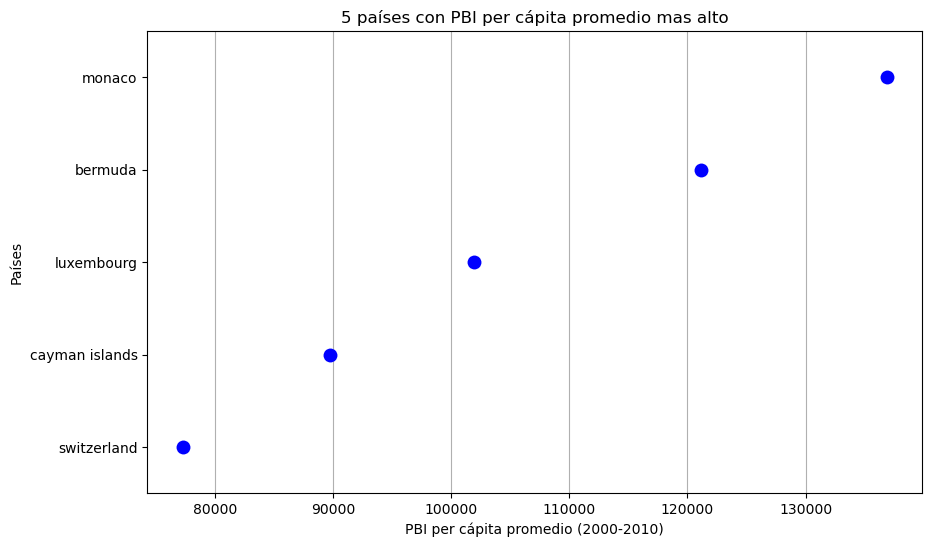

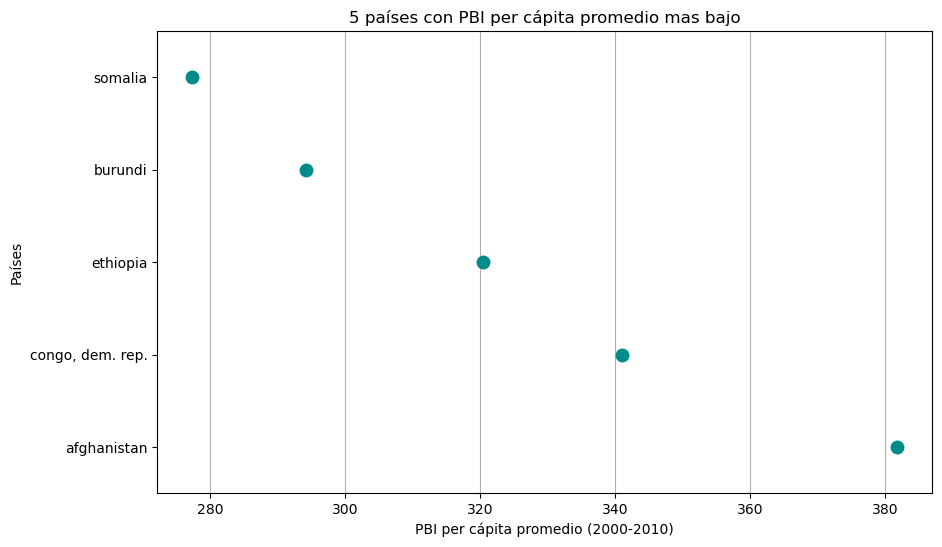

In [270]:
#C) Respuesta
gdp_pc["Year"] = gdp_pc["Year"].astype(int)
gdp_pc_prom = gdp_pc[ (gdp_pc["Country"].isin(paises)) & (gdp_pc["Year"].between(2000, 2010)) ]

# Crear tabla en donde tenga los paises y sus promedios entre 2000 y 2010 
gdp_promedio = gdp_pc_prom.groupby("Country")["value"].mean().reset_index()
gdp_promedio = gdp_promedio.rename(columns={"value": "Average"})

# Genero tablas con los promedios mas altos y mas bajos para generar gráficos 
top5 = gdp_promedio.sort_values(by="Average", ascending=False).head(5)
bot5 = gdp_promedio.sort_values(by="Average", ascending=True).head(5) 

# Creo gráficos 
plt.figure(figsize=(10,6))
sns.stripplot(x="Average", y="Country", data=top5, size=10, color="blue")
plt.title("5 países con PBI per cápita promedio mas alto")
plt.xlabel("PBI per cápita promedio (2000-2010)")
plt.ylabel("Países")
plt.grid(True, axis='x')
plt.show()

plt.figure(figsize=(10,6))
sns.stripplot(x="Average", y="Country", data=bot5, size=10, color="DarkCyan")
plt.title("5 países con PBI per cápita promedio mas bajo")
plt.xlabel("PBI per cápita promedio (2000-2010)")
plt.ylabel("Países")
plt.grid(True, axis='x')
plt.show()

Los países con mayor crecimiento del PBI per cápita en la primera década del 2000  promedio son: 

-Monaco

-Bermuda (Territorio de ultramar del Reino Unido)

-Luxenburgo

-Islas Caiman (Territorio de ultramar del Reino Unido)

-Suiza


Los países con menor crecimiento del PBI per cápita en la primera década del 2000 promedio son: 

-Somalia

-Burundí

-Ethiopia

-Repúbica Democrática del Congo

-Afghanistan



d) Al año 2023, ¿cuál es el continente de mayor pbi per cápita promedio?

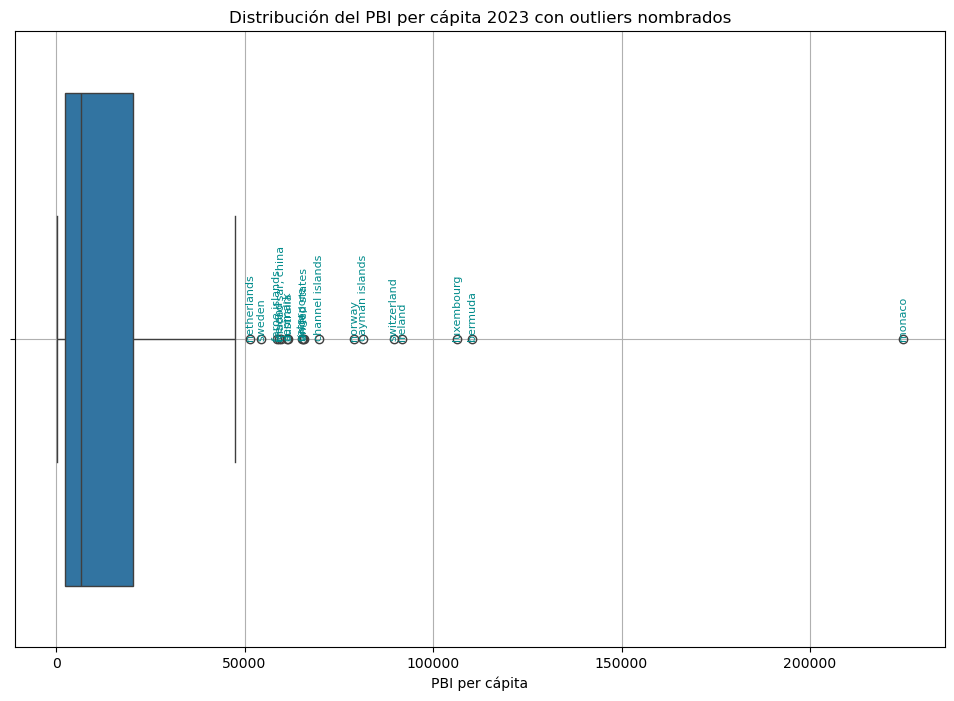

,Country,value,continent
0,monaco,"224.582,45",europa
1,bermuda,"110.409,81",américa
2,luxembourg,"106.342,76",europa
3,ireland,"91.647,77",europa
4,switzerland,"89.555,56",europa
5,cayman islands,"81.411,65",américa
6,norway,"78.912,33",europa
7,channel islands,"69.822,95",europa
8,united states,"65.875,18",américa
9,singapore,"65.422,46",asia


,continent,count_country,amount
0,europa,11,"945.676,81"
1,américa,3,"257.696,63"
2,asia,3,"190.135,85"
3,oceanía,1,"61.583,92"


,Country,Series,Year,value
18,united kingdom,GDP per capita (constant 2015 US$),2023,"47.322,67"
19,austria,GDP per capita (constant 2015 US$),2023,"46.338,96"
20,finland,GDP per capita (constant 2015 US$),2023,"45.588,51"
21,belgium,GDP per capita (constant 2015 US$),2023,"44.731,04"
22,canada,GDP per capita (constant 2015 US$),2023,"44.468,75"
23,germany,GDP per capita (constant 2015 US$),2023,"44.336,78"
24,"hong kong sar, china",GDP per capita (constant 2015 US$),2023,"43.572,96"
25,israel,GDP per capita (constant 2015 US$),2023,"42.852,58"
26,new zealand,GDP per capita (constant 2015 US$),2023,"41.766,87"
27,andorra,GDP per capita (constant 2015 US$),2023,"40.227,23"


In [271]:
# Respuesta D: 
#Creo una tabla para realizar el grafico Boxplot para 2023
gdp_2023D = gdp_pc[(gdp_pc["Country"].isin(paises)) & (gdp_pc["Year"] == 2023)]

# Creo boxplot
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="value", data = gdp_2023D, showfliers=True)

# Deteccion de outliers 
q1 = gdp_2023D["value"].quantile(0.25)
q3 = gdp_2023D["value"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar outliers
outliers_2023D = gdp_2023D[(gdp_2023D["value"] < lower_bound) | (gdp_2023D["value"] > upper_bound)]

for i in range(outliers_2023D.shape[0]):
    plt.text(outliers_2023D.iloc[i]["value"], 0, outliers_2023D.iloc[i]["Country"],
             horizontalalignment='center', fontsize=8, color='DarkCyan', rotation=90)

plt.title("Distribución del PBI per cápita 2023 con outliers nombrados")
plt.xlabel("PBI per cápita")
plt.grid(True)
plt.show()

#Viendo los paises que sobresalen por tener PBIs muy altos realizo la siguiente tabla 
outliers_2023D_F = outliers_2023D[["Country", "value"]].copy()
outliers_2023D_F.columns.name = None 

#Le asigno a cada uno de estos paises su correspondiente continente
europa = ["monaco", "luxembourg", "ireland", "switzerland", "united kingdom", "norway", "channel islands", "denmark","iceland","faroe islands", "sweden", "netherlands"]
america = ["bermuda","cayman islands","united states"]
asia = ["macao sar, china", "singapore", "qatar"]
oceania = ["australia"]

def continente(pais):
    if pais in europa:
        return "europa"
    elif pais in america:
        return "américa"
    elif pais in asia:
        return "asia"
    elif pais in oceania:
        return "oceanía"
    else:
        return "otro"
    
outliers_2023D_F["continent"] = outliers_2023D_F["Country"].apply(continente)

# En esta segunda parte armo tablas para analisar mas en detalle
paises = outliers_2023D_F.groupby("continent")["Country"].nunique()
monto = outliers_2023D_F.groupby("continent")["value"].sum()

# Creo nueva tabla
tf = outliers_2023D_F.groupby("continent").agg(
    count_country = ("Country", "count"),
    amount = ("value", "sum")
).reset_index()

#Resultado Final
outliers_2023D_F = outliers_2023D_F.sort_values(by="value", ascending=False).reset_index(drop=True)
display(outliers_2023D_F.style
    .format({"value": lambda x: "{:,.2f}".format(x).replace(",", "X").replace(".", ",").replace("X", ".")})
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)

tf = tf.sort_values(by="amount", ascending=False).reset_index(drop=True)
display(tf.style
    .format({"amount": lambda x: "{:,.2f}".format(x).replace(",", "X").replace(".", ",").replace("X", ".")})
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)
gdp_2023D = gdp_2023D.sort_values(by="value", ascending=False).reset_index(drop=True)
display(
    gdp_2023D[18:40].style
    .format({"value": lambda x: "{:,.2f}".format(x).replace(",", "X").replace(".", ",").replace("X", ".")})
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)


 En las tablas finales 1 y 2 se puede ver el analisis de los outliers, en este caso la mayoria de ellos pertenecen al continente europeo. En la tabla final 3 reviso los paises con PBI per capita mas alto que no superan los 'bigotes' de la caja, 11 de los 21 paises son europeos. Haciendo una lectura del grafico boxplot donde se puede ver que la mayoria de los paises tienen un PBI bajo en comparacion con estos casos analizados. El gráfico presenta una asimetria positiva y la mayoria de estos paises con valores altos pertenecen al continente europeo. Si se realizara un promedio de cada continente estos valores indicarian que el continente europeo es el que tiene el mayor PBI per capita promedio. En este analisis se realiza teniendo en cuenta todos los paises propios de cada continente eliminando cualquier otra delimitacion territorial.

e) Grafique 2 boxplots comparados: uno tomando la serie de datos para el año 1990 y otro 2023. ¿Qué puede concluir acerca de la comparación de la tendencia central y dispersión de los datos? ¿Encuentra algún valor atípico al visualizar el boxplot? En caso de hacerlo, identifíquelos y comente al respecto.

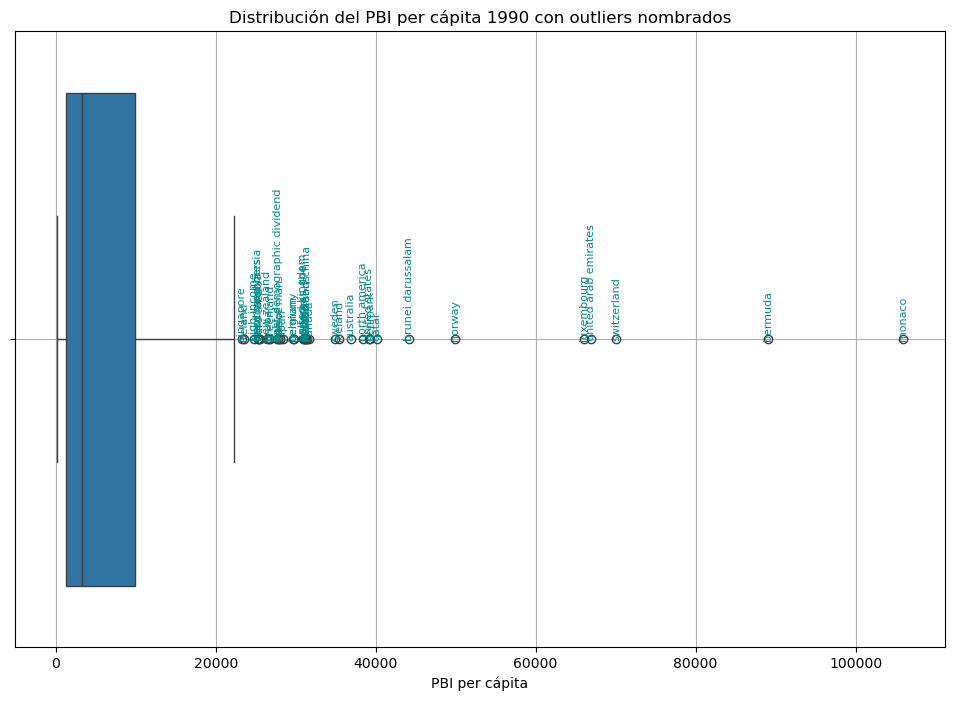

,Country,Series,Year,value
0,monaco,GDP per capita (constant 2015 US$),1990,"105.878,37"
1,bermuda,GDP per capita (constant 2015 US$),1990,"89.089,73"
2,switzerland,GDP per capita (constant 2015 US$),1990,"70.063,85"
3,united arab emirates,GDP per capita (constant 2015 US$),1990,"66.979,16"
4,luxembourg,GDP per capita (constant 2015 US$),1990,"66.027,08"
5,norway,GDP per capita (constant 2015 US$),1990,"49.937,46"
6,brunei darussalam,GDP per capita (constant 2015 US$),1990,"44.179,83"
7,qatar,GDP per capita (constant 2015 US$),1990,"40.125,45"
8,denmark,GDP per capita (constant 2015 US$),1990,"39.306,79"
9,united states,GDP per capita (constant 2015 US$),1990,"39.200,07"


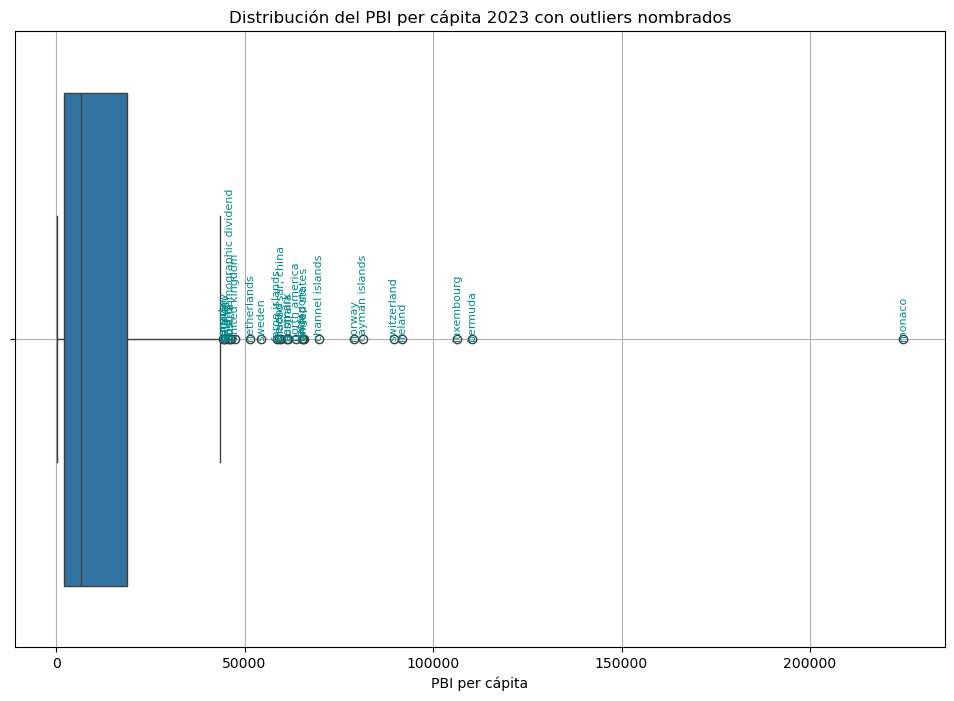

,Country,Series,Year,value
0,monaco,GDP per capita (constant 2015 US$),2023,"224.582,45"
1,bermuda,GDP per capita (constant 2015 US$),2023,"110.409,81"
2,luxembourg,GDP per capita (constant 2015 US$),2023,"106.342,76"
3,ireland,GDP per capita (constant 2015 US$),2023,"91.647,77"
4,switzerland,GDP per capita (constant 2015 US$),2023,"89.555,56"
5,cayman islands,GDP per capita (constant 2015 US$),2023,"81.411,65"
6,norway,GDP per capita (constant 2015 US$),2023,"78.912,33"
7,channel islands,GDP per capita (constant 2015 US$),2023,"69.822,95"
8,united states,GDP per capita (constant 2015 US$),2023,"65.875,18"
9,singapore,GDP per capita (constant 2015 US$),2023,"65.422,46"


In [276]:
# Respuesta E:
#I) Grafico Boxplot para 1990
#Creo una tabla para realizar el grafico 
gdp_1990 = gdp_pc[(gdp_pc["Year"] == 1990)]

# Creo el boxplot
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="value", data=gdp_1990, showfliers=True)

# Deteccion de outliers
q1 = gdp_1990["value"].quantile(0.25)
q3 = gdp_1990["value"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar solo outliers
outliers = gdp_1990[(gdp_1990["value"] < lower_bound) | (gdp_1990["value"] > upper_bound)]

# Etiquetas con el nombre del país
for i in range(outliers.shape[0]):
    plt.text(outliers.iloc[i]["value"], 0, outliers.iloc[i]["Country"],
             horizontalalignment='center', fontsize=8, color='DarkCyan', rotation=90)

plt.title("Distribución del PBI per cápita 1990 con outliers nombrados")
plt.xlabel("PBI per cápita")
plt.grid(True)
plt.show()

#Como no se ve bien debido a que hay algunos puntos que estan muy cerca. Creo una lista para saber cuales son los outliers 
outliers = outliers.sort_values(by="value", ascending=False).reset_index(drop=True)
display(outliers.style
    .format({"value": lambda x: "{:,.2f}".format(x).replace(",", "X").replace(".", ",").replace("X", ".")})
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)

#II) Grafico Boxplot para 2023
#Creo una tabla para realizar el grafico 
gdp_2023 = gdp_pc[(gdp_pc["Year"] == 2023)]

# Creo el boxplot
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="value", data = gdp_2023, showfliers=True)

# Deteccion de outliers
q1 = gdp_2023["value"].quantile(0.25)
q3 = gdp_2023["value"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar solo outliers
outliers_2023 = gdp_2023[(gdp_2023["value"] < lower_bound) | (gdp_2023["value"] > upper_bound)]

# Agregar etiquetas con el nombre del país
for i in range(outliers_2023.shape[0]):
    plt.text(outliers_2023.iloc[i]["value"], 0, outliers_2023.iloc[i]["Country"],
             horizontalalignment='center', fontsize=8, color='DarkCyan', rotation=90)

plt.title("Distribución del PBI per cápita 2023 con outliers nombrados")
plt.xlabel("PBI per cápita")
plt.grid(True)
plt.show()

#Como no se ve bien debido a que hay algunos puntos que estan muy cerca. Creo una lista para saber cuales son los outliers 
outliers_2023 = outliers_2023.sort_values(by="value", ascending=False).reset_index(drop=True)
display(outliers_2023.style
    .format({"value": lambda x: "{:,.2f}".format(x).replace(",", "X").replace(".", ",").replace("X", ".")})
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)


Al ver ambos gráficos y con el fin de analizar una distribucion territorial específica se podrían filtrar todas las filas que no sean paises. Sin embargo hay varios paises que se alejan mucho de la tendencia central y terminan siendo outliers. Los mismos indican que tienen un PBI per capita muy alto a diferencia de lo general; estos no deben filtrarse porque se estaria perdiendo una parte del analisis. Esto genera una asimetría positiva en el gráfico que refleja la fuerte desigualdad económica entre naciones.

En ambos gráficos no se movió mucho el PBI per cápita típico indicado por la línea media; Eso quiere decir que la mayoria de los paises mantuvieron la tendencia. Se destaca que los países más ricos son los outliers y estan muy lejos de los valores centrales. 

La tendencia central(la mediana) está muy cerca del límite inferior de la caja, indicando que más del 50% de los países tienen un PBI per cápita bajo y como los outliers son muy grandes la media(promedio) estaria por ensima de la mediana. Esto provoca que la media no sea representativa para el conjunto de los datos.  

Otro tema a destacar son las islas que dependen de otro pais pero para la tabla es un pais ya que algunas ademas son outliers. Esto depende del tipo de analisis que se quiera realizar(saber si se integran sus datos al país central o se analizan por separado).

